# DDOS Prediction 

Requirements

In [123]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



###########################################################################################################################################################################################

In [124]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv('C:\\Users\\Dev\\Desktop\\Project-2\\Data\\dataset_sdn.csv')

In [125]:
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,101000000000.00,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.00,0.00,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,281000000000.00,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.00,0.00,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.00,0.00,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.00,0.00,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,81842000000.00,5,10,29,2842,0,0,ICMP,1,15209,12720,1,1.00,2.00,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,81842000000.00,5,10,29,2842,0,0,ICMP,3,15099,14693,1,1.00,2.00,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,31805000000.00,5,10,30,2940,1,0,ICMP,2,3409,3731,0,0.00,0.00,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,31805000000.00,5,10,30,2940,1,0,ICMP,1,15209,12720,1,1.00,2.00,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [127]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [128]:
df['rx_kbps']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
104340   1.00
104341   1.00
104342   0.00
104343   1.00
104344   1.00
Name: rx_kbps, Length: 104345, dtype: float64

In [129]:
df = df.dropna()

104345 - 506 = 50103839 New Entries

In [130]:
df.isnull().sum()


dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [131]:
# df['dt'].describe()
analysis_df = df.describe()

In [132]:
analysis_df

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00,103839.00
mean,17999.45,4.21,52781.70,38017286.38,322.13,461373404.98,322515117113.99,5.67,5196.26,6365.87,4689472.45,211.68,0.60,2.34,93707039.46,93734918.68,1003.77,1003.81,2007.58,0.39
std,11962.23,1.96,52061.41,48745443.35,283.93,277101961.21,283810425735.12,2.95,5266.63,7413.26,7562022.62,247.14,0.49,1.08,152167893.36,133164237.98,2428.36,2054.89,3144.44,0.49
min,2488.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,4.00,-130933.00,-146442594.00,-4365.00,0.00,1.00,2527.00,856.00,0.00,0.00,0.00,0.00
25%,7128.00,3.00,801.00,79282.00,128.00,233000000.00,128000000000.00,3.00,1943.00,29.00,2842.00,0.00,0.00,1.00,4799.00,3539.00,0.00,0.00,0.00,0.00
50%,11965.00,4.00,42557.00,6409692.00,252.00,418000000.00,252000000000.00,5.00,3024.00,8304.00,544736.00,276.00,1.00,2.00,4552643.00,14011344.00,0.00,0.00,4.00,0.00
75%,29982.00,5.00,94683.00,75972220.00,413.00,704000000.00,413000000000.00,7.00,7385.00,10004.00,9727070.00,333.00,1.00,3.00,135650931.00,143928631.00,255.00,557.00,3838.00,1.00
max,42935.00,10.00,260006.00,147128002.00,1881.00,999000000.00,1880000000000.00,17.00,25224.00,19190.00,14953872.00,639.00,1.00,5.00,1269981973.00,990596183.00,20580.00,16577.00,20580.00,1.00


In [133]:
analysis_df.loc['75%'].astype(float)

dt                   29982.00
switch                   5.00
pktcount             94683.00
bytecount         75972220.00
dur                    413.00
dur_nsec         704000000.00
tot_dur       413000000000.00
flows                    7.00
packetins             7385.00
pktperflow           10004.00
byteperflow        9727070.00
pktrate                333.00
Pairflow                 1.00
port_no                  3.00
tx_bytes         135650931.00
rx_bytes         143928631.00
tx_kbps                255.00
rx_kbps                557.00
tot_kbps              3838.00
label                    1.00
Name: 75%, dtype: float64

In [134]:
pd.options.display.float_format = '{:.2f}'.format

In [135]:
row_75_percent = analysis_df.loc['75%'].astype(float)
row_75_percent

dt                   29982.00
switch                   5.00
pktcount             94683.00
bytecount         75972220.00
dur                    413.00
dur_nsec         704000000.00
tot_dur       413000000000.00
flows                    7.00
packetins             7385.00
pktperflow           10004.00
byteperflow        9727070.00
pktrate                333.00
Pairflow                 1.00
port_no                  3.00
tx_bytes         135650931.00
rx_bytes         143928631.00
tx_kbps                255.00
rx_kbps                557.00
tot_kbps              3838.00
label                    1.00
Name: 75%, dtype: float64

In [136]:
row_25_percent = analysis_df.loc['25%'].astype(float)
row_25_percent

dt                    7128.00
switch                   3.00
pktcount               801.00
bytecount            79282.00
dur                    128.00
dur_nsec         233000000.00
tot_dur       128000000000.00
flows                    3.00
packetins             1943.00
pktperflow              29.00
byteperflow           2842.00
pktrate                  0.00
Pairflow                 0.00
port_no                  1.00
tx_bytes              4799.00
rx_bytes              3539.00
tx_kbps                  0.00
rx_kbps                  0.00
tot_kbps                 0.00
label                    0.00
Name: 25%, dtype: float64

In [137]:
median = analysis_df.loc['50%'].astype(float)
median

dt                   11965.00
switch                   4.00
pktcount             42557.00
bytecount          6409692.00
dur                    252.00
dur_nsec         418000000.00
tot_dur       252000000000.00
flows                    5.00
packetins             3024.00
pktperflow            8304.00
byteperflow         544736.00
pktrate                276.00
Pairflow                 1.00
port_no                  2.00
tx_bytes           4552643.00
rx_bytes          14011344.00
tx_kbps                  0.00
rx_kbps                  0.00
tot_kbps                 4.00
label                    0.00
Name: 50%, dtype: float64

In [138]:
diff_75_median = row_75_percent - median
diff_median_25 = median - row_25_percent

In [139]:
count_right_skewd = 0
count_left_skewd = 0
for column in diff_75_median.index:
    if diff_75_median[column] > diff_median_25[column]:
        count_right_skewd+=1
    if diff_median_25[column]>diff_75_median[column]:
        count_left_skewd+=1
    
print(count_left_skewd,count_right_skewd)

3 14


The data Set is Right Skewd
Methods : Sqroot Trnsfrm , logTrnsfrm

In [140]:
exclude_list = []
for column in df.columns:
    if df[column].dtypes == 'object':
        exclude_list.append(column)
   
        
print(exclude_list)

['src', 'dst', 'Protocol']


In [141]:
skew_data = df.drop(exclude_list ,axis =1)

dt
0.2957943282955423


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


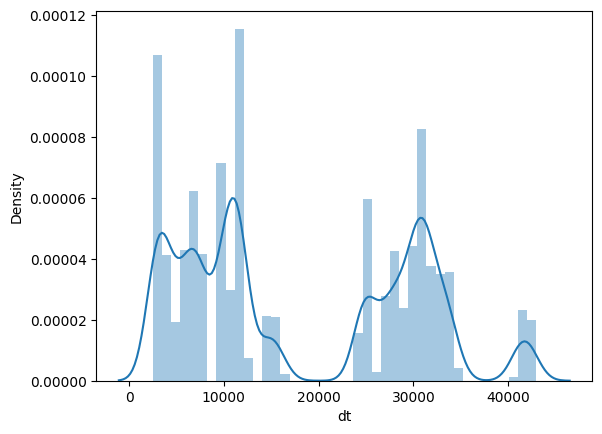

switch
0.5057695603220334


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


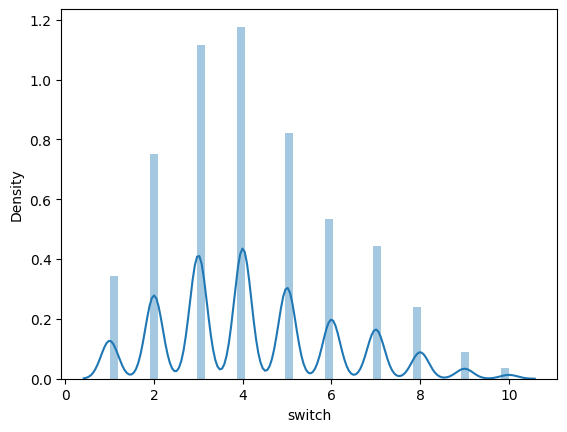

pktcount
0.7865602880204106


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


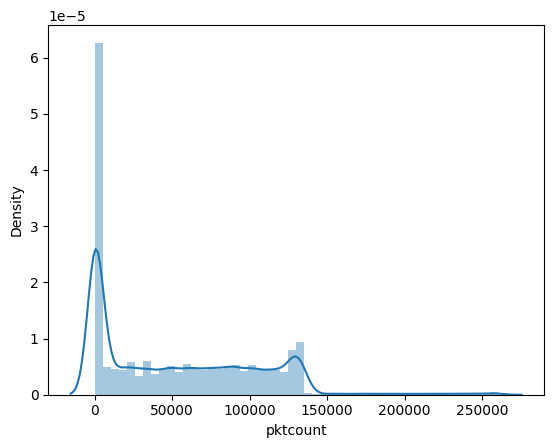

bytecount
0.9654792173809362


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


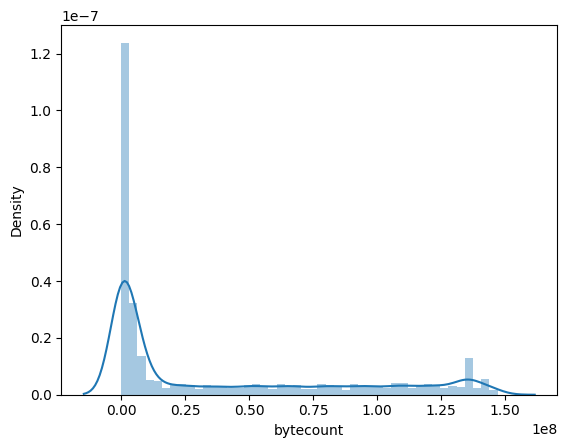

dur
1.7862686415549136


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


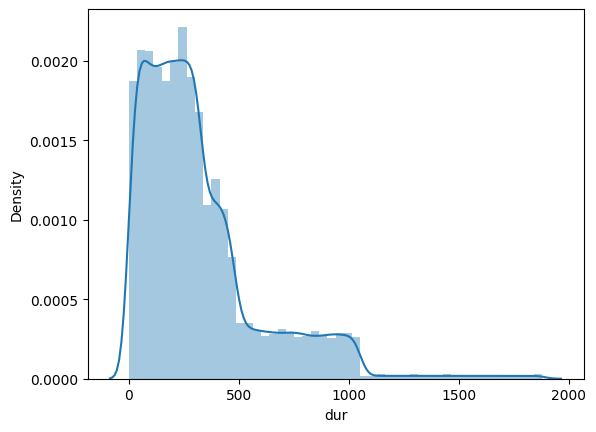

dur_nsec
0.28649549065549856


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


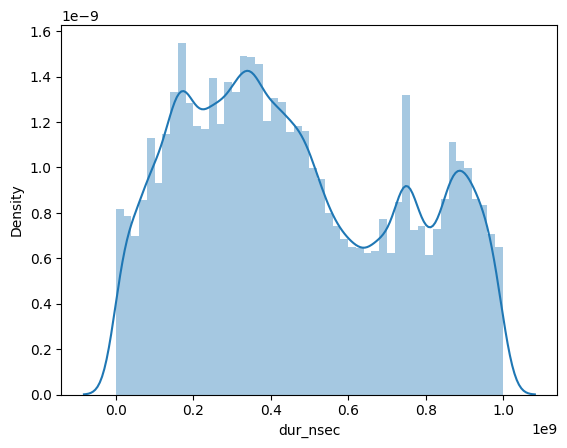

tot_dur
1.785013936953386


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


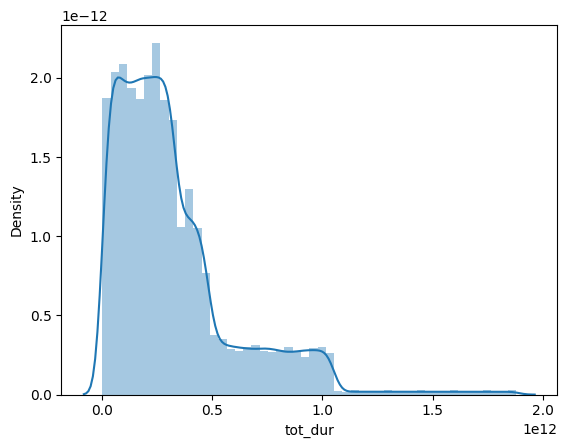

flows
0.9876447161517378


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


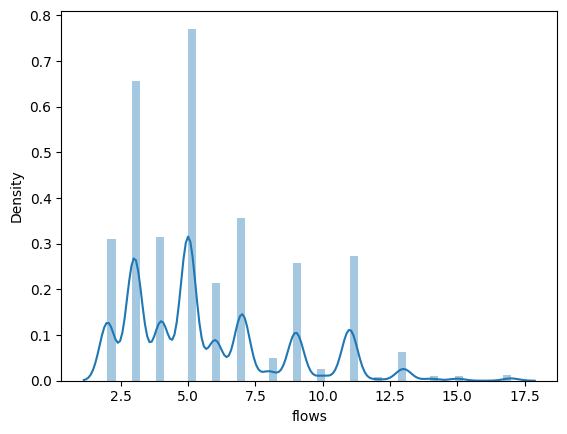

packetins
1.9764783184533106


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


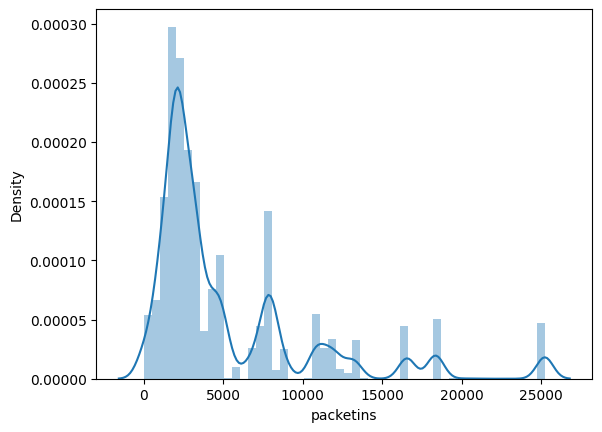

pktperflow
-6.7030213963940675


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


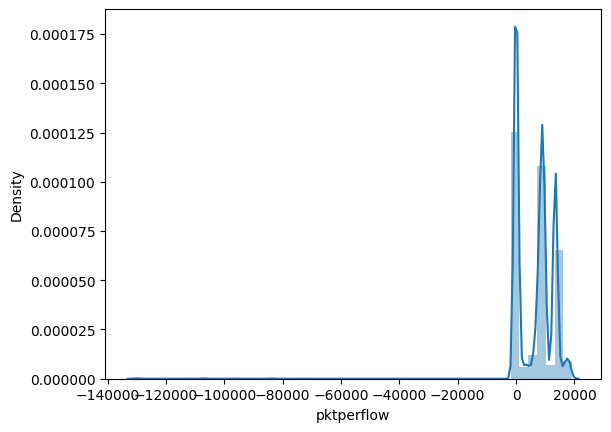

byteperflow
-6.455588576612462


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


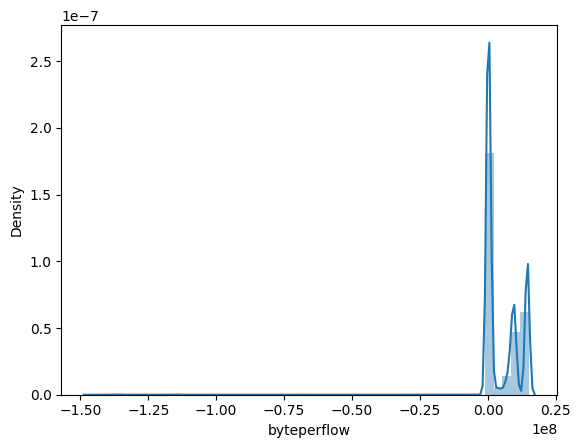

pktrate
-6.700848531284975


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


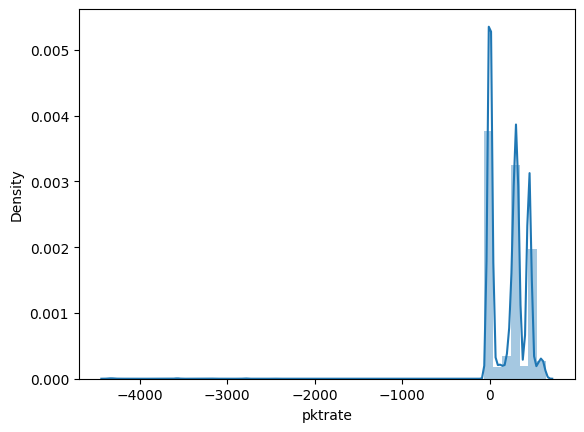

Pairflow
-0.4249414438550154


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


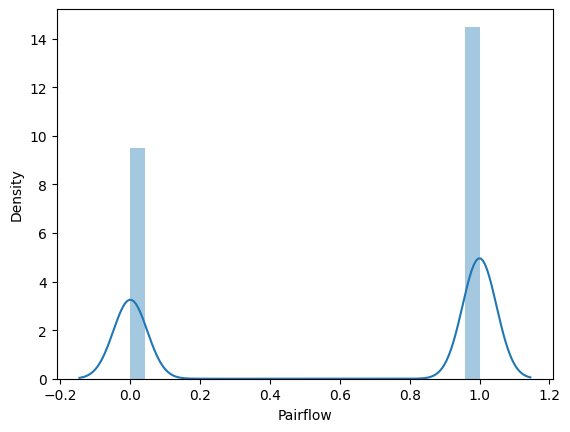

port_no
0.2850367831366171


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


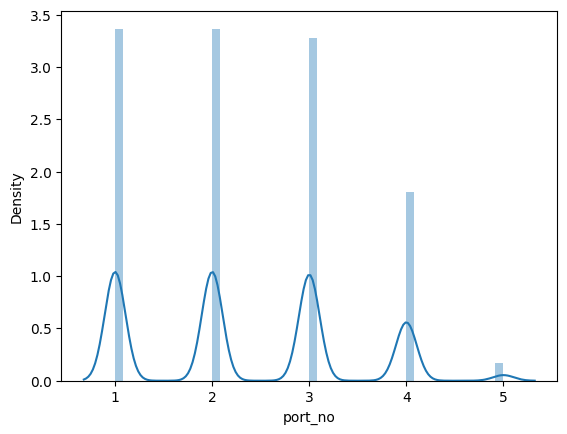

tx_bytes
2.0453893211970073


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


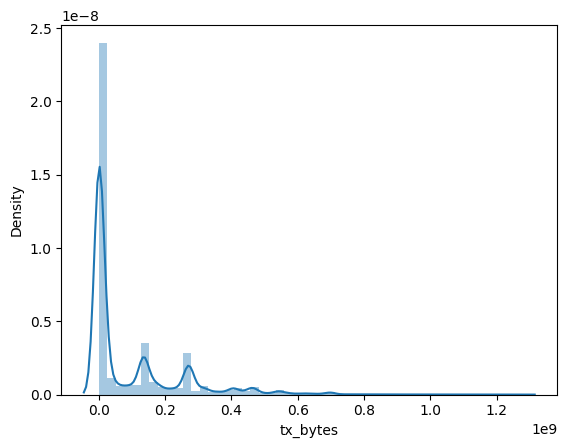

rx_bytes
1.793046945593693


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


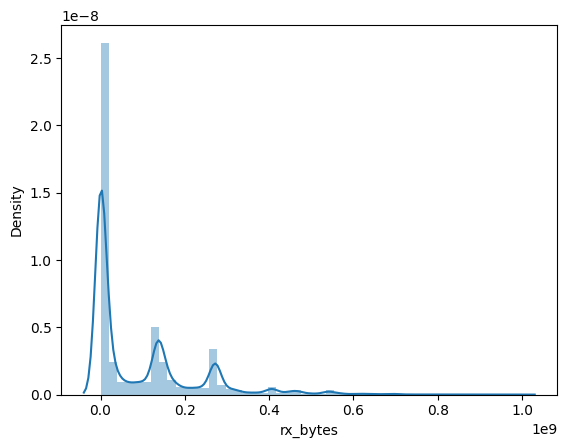

tx_kbps
3.273151286964097


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


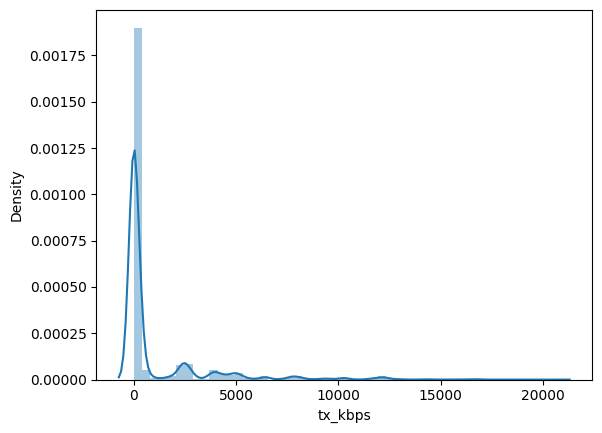

rx_kbps
2.652812429141817


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


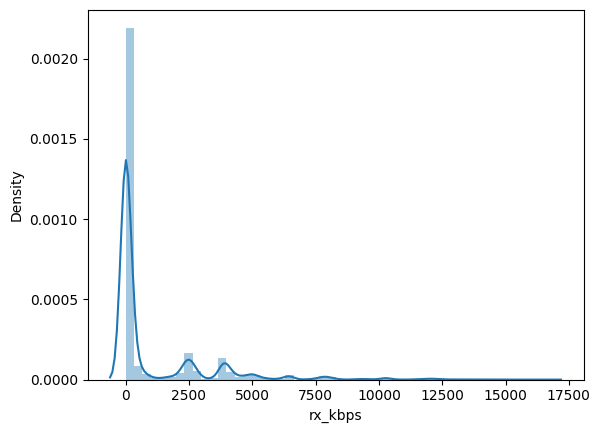

tot_kbps
1.8374310348610763


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


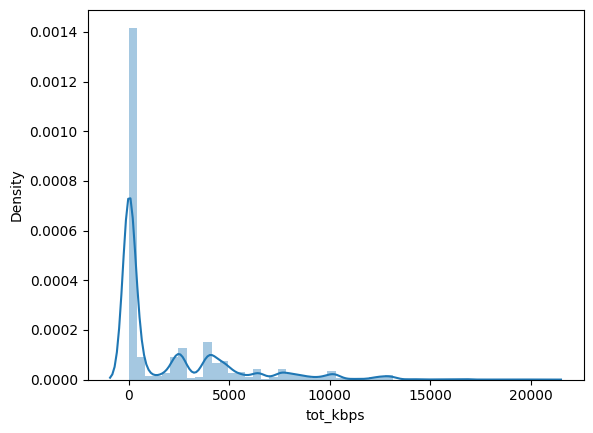

label
0.450769049861299


C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\3688542926.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(skew_data[col])


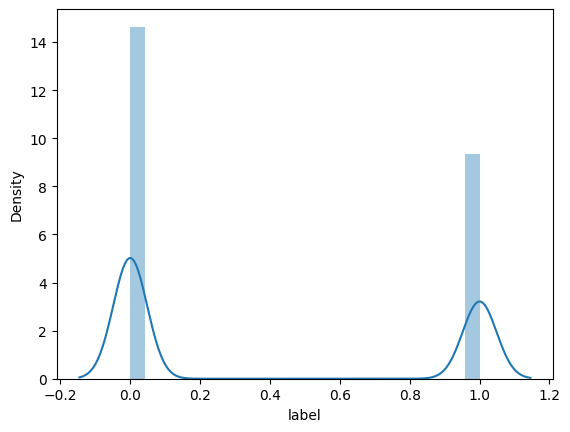

In [142]:
skew_list = []
for col in skew_data.columns:
    print(col)
    print(skew(skew_data[col]))
    if skew(skew_data[col]) > 0.50:
         skew_list.append(col)
    
    plt.figure()
    sns.distplot(skew_data[col])
    plt.show()

In [143]:
skew_list

['switch',
 'pktcount',
 'bytecount',
 'dur',
 'tot_dur',
 'flows',
 'packetins',
 'tx_bytes',
 'rx_bytes',
 'tx_kbps',
 'rx_kbps',
 'tot_kbps']

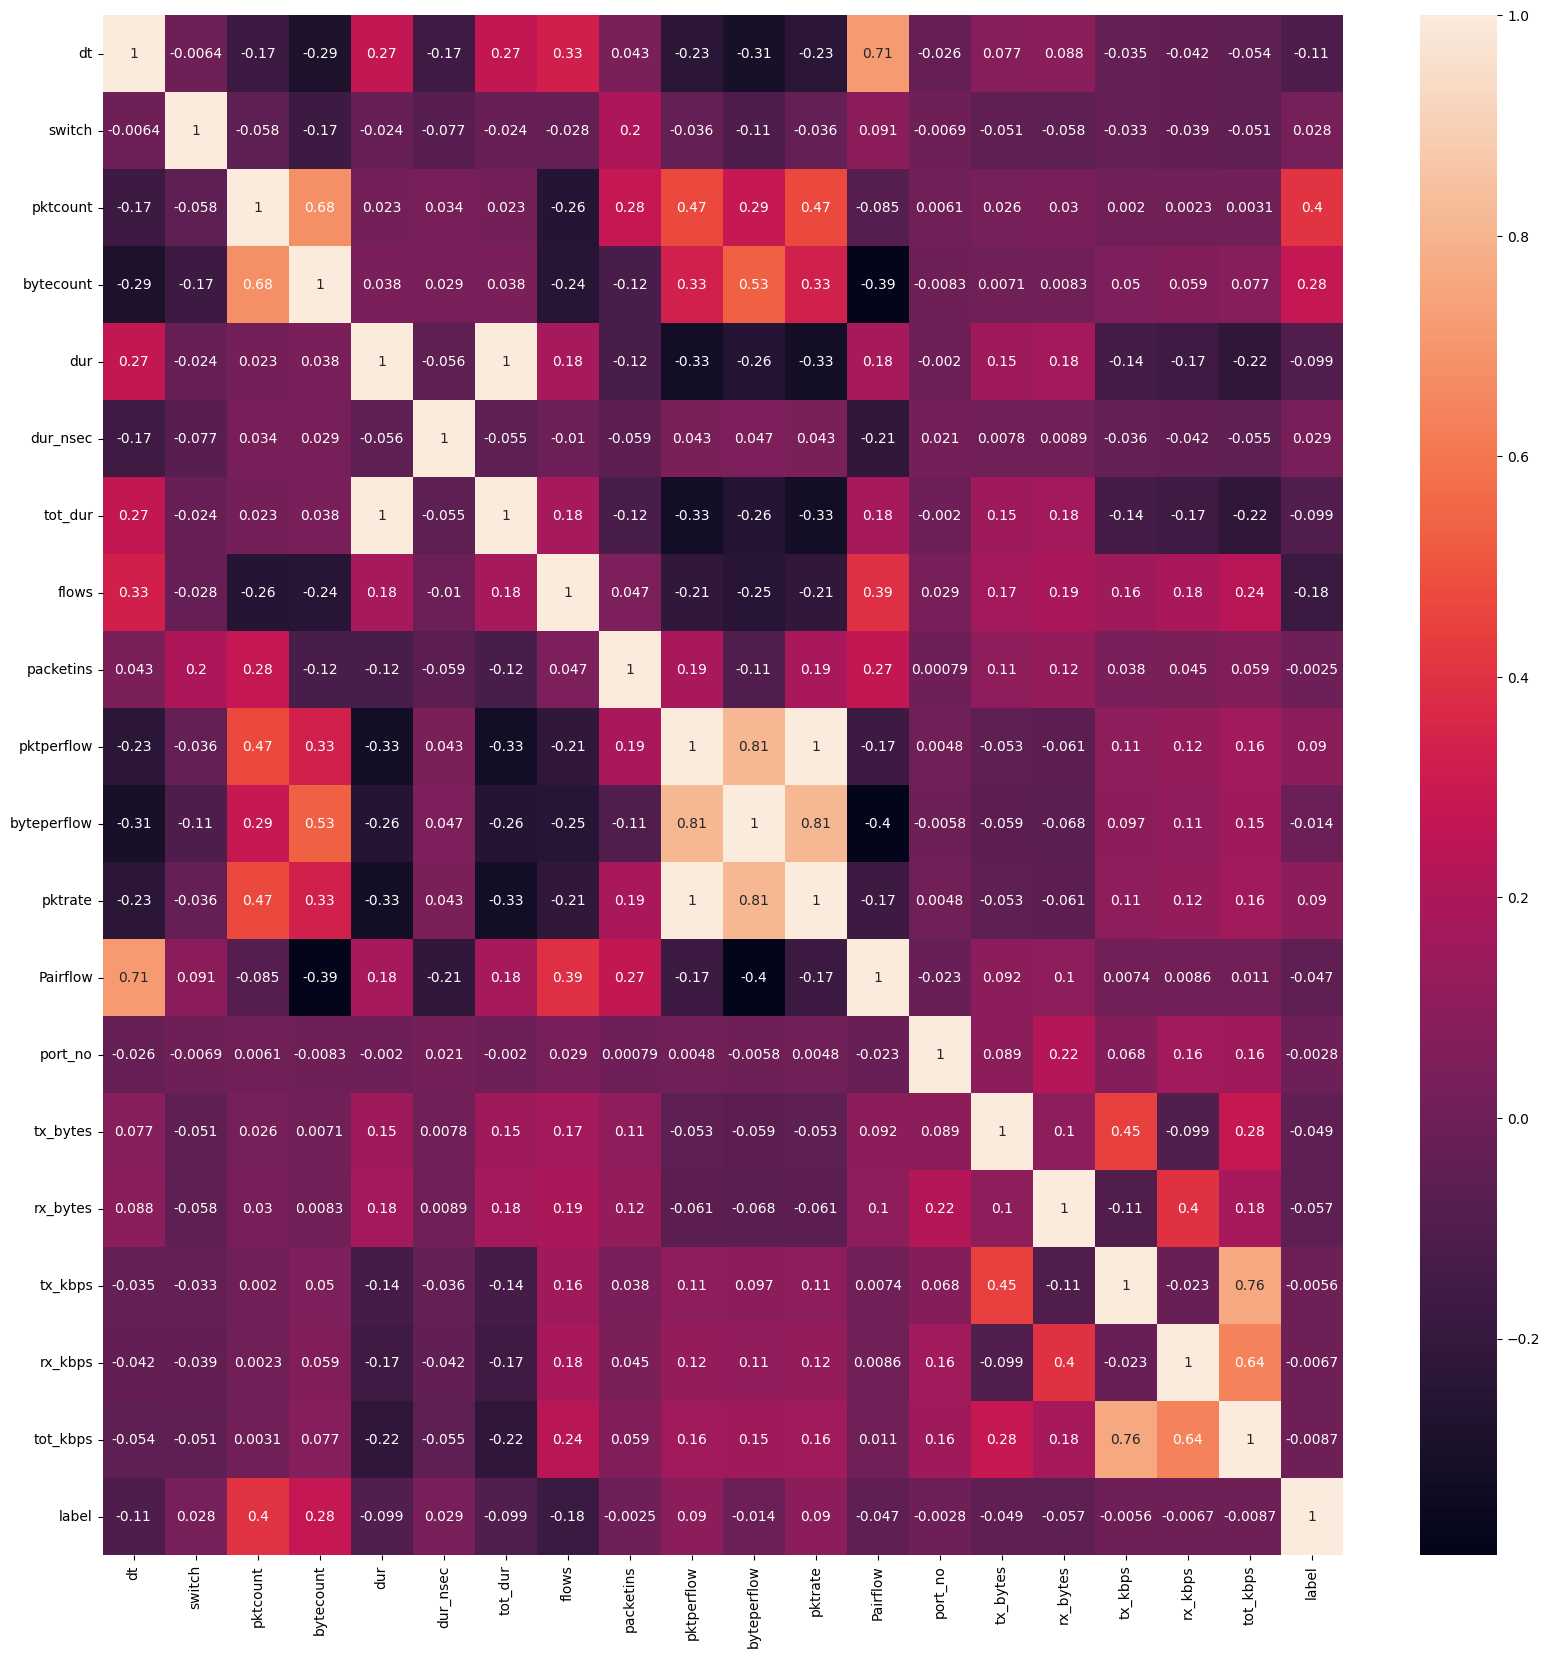

In [144]:
plt.figure(figsize=(20, 20))  
sns.heatmap(skew_data.corr(), annot=True)
plt.show()



Inference: Only pktcount will be addressed in terms of skewness , not disturbing corr for remaining cols 

In [145]:
df['pktcount'] = np.sqrt(df['pktcount'])

C:\Users\Dev\AppData\Local\Temp\ipykernel_9016\525729028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pktcount'] = np.sqrt(df['pktcount'])


In [146]:
skew(df['pktcount'])

-0.0008326739697849315

Hence Skewness in PKTcount is solved

In [147]:
skew_data_1 = df.drop(exclude_list ,axis =1)

In [148]:
skew_data_1

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,212.85,48294064,100,716000000,101000000000.00,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.00,0.00,0
1,11605,1,355.52,134737070,280,734000000,281000000000.00,2,1943,13531,14424046,451,0,4,3842,3520,0,0.00,0.00,0
2,11425,1,300.55,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,1,3795,1242,0,0.00,0.00,0
3,11425,1,300.55,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,2,3688,1492,0,0.00,0.00,0
4,11425,1,300.55,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,3,3413,3665,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,8.89,7742,81,842000000,81842000000.00,5,10,29,2842,0,0,1,15209,12720,1,1.00,2.00,0
104341,5262,3,8.89,7742,81,842000000,81842000000.00,5,10,29,2842,0,0,3,15099,14693,1,1.00,2.00,0
104342,5262,3,5.57,3038,31,805000000,31805000000.00,5,10,30,2940,1,0,2,3409,3731,0,0.00,0.00,0
104343,5262,3,5.57,3038,31,805000000,31805000000.00,5,10,30,2940,1,0,1,15209,12720,1,1.00,2.00,0


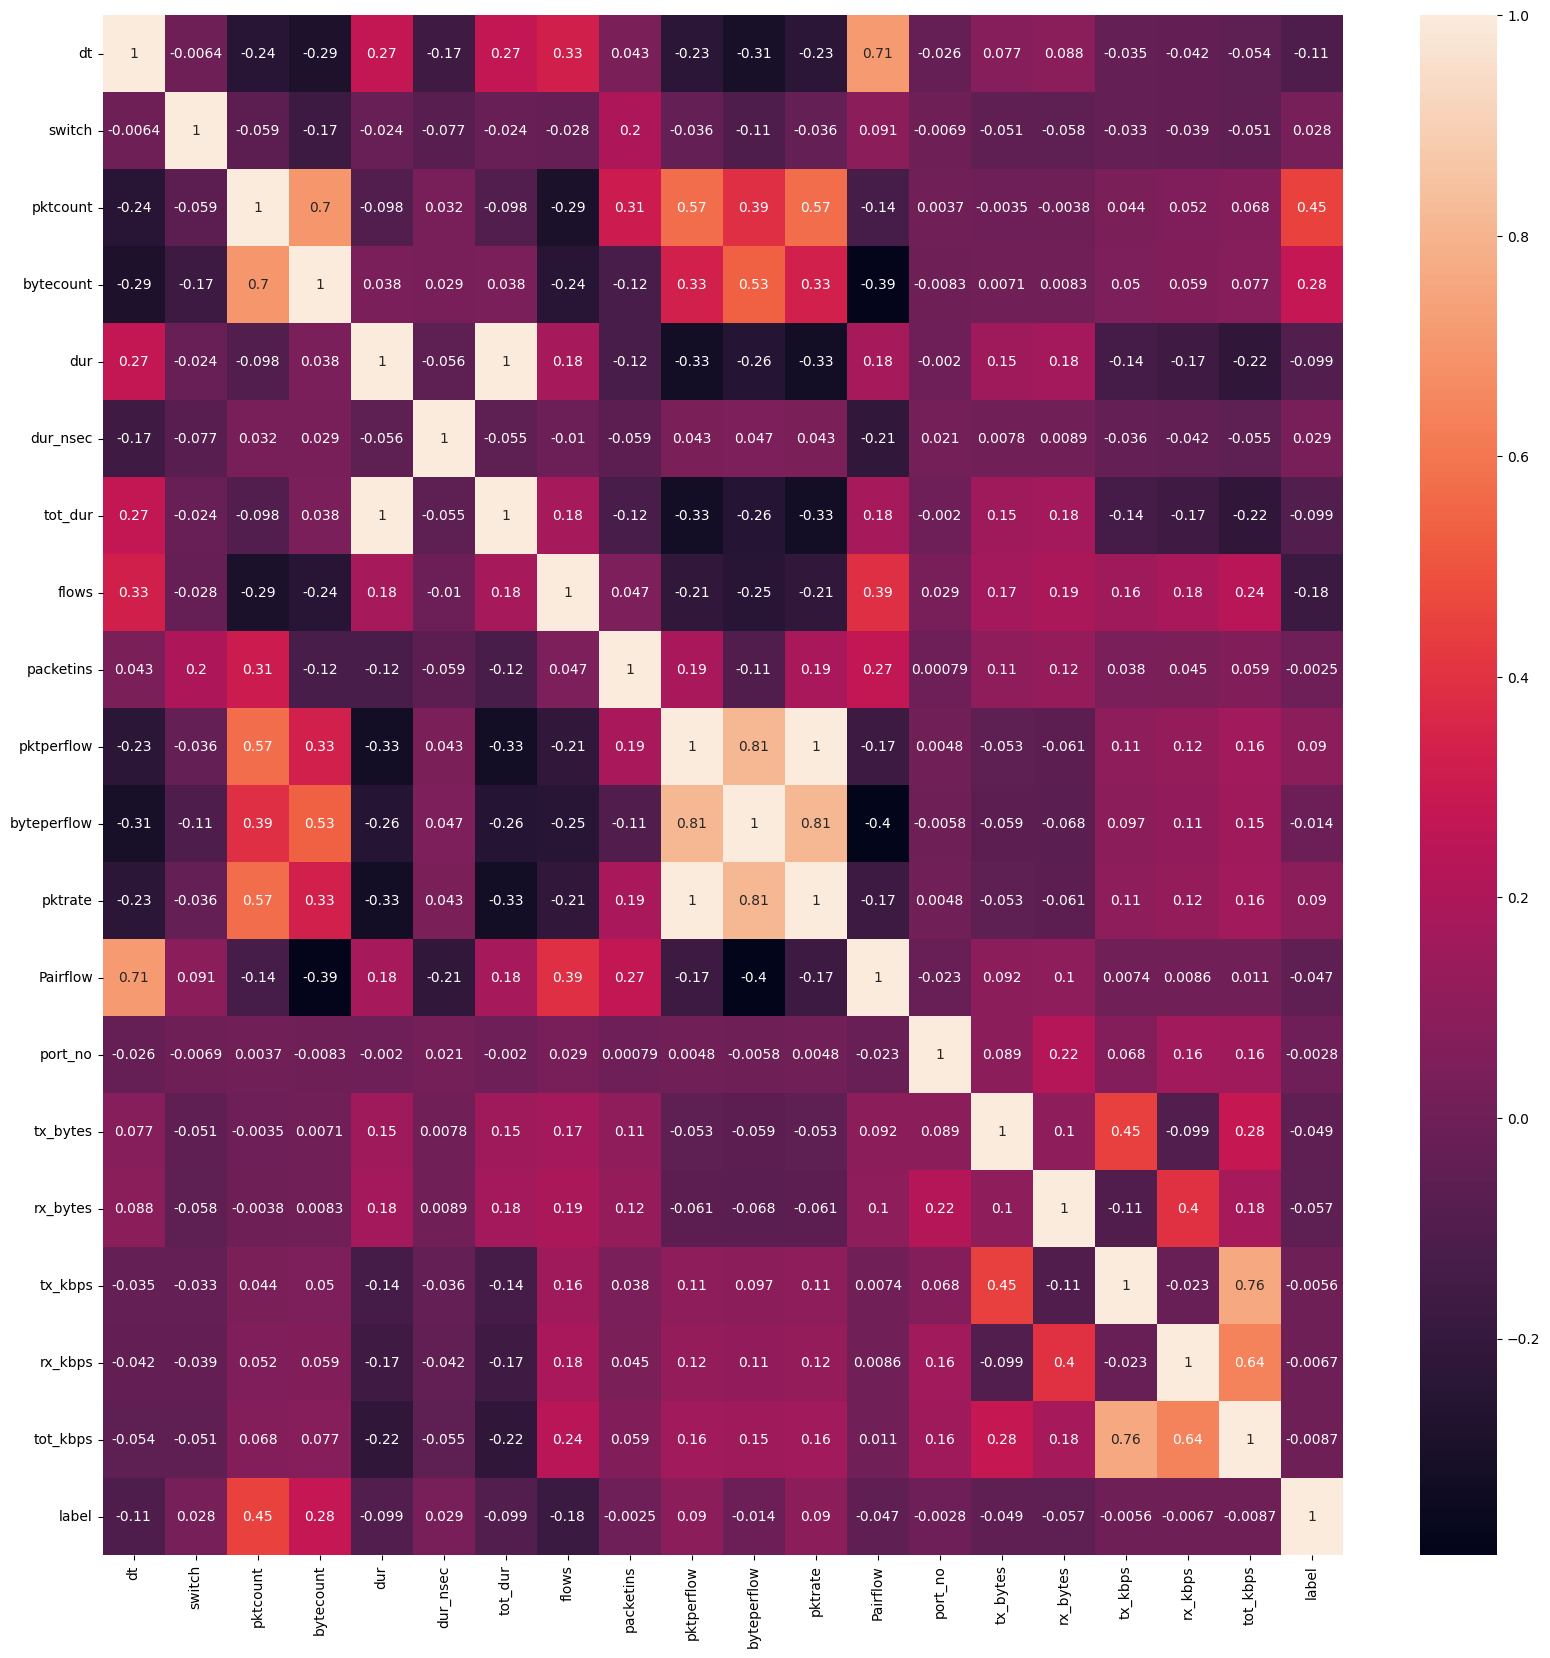

In [149]:
plt.figure(figsize=(20,20))
sns.heatmap(skew_data_1.corr(),annot=True)
plt.show()

In [150]:
updated_skew_list = []
for col in skew_data_1.columns:
    if skew(skew_data_1[col])> 0.50:
        updated_skew_list.append(col)
        
        
print(updated_skew_list)
    

['switch', 'bytecount', 'dur', 'tot_dur', 'flows', 'packetins', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


Pkcount Skewness is resolved , rest are ignored due to correlativity constraints


Destination Analysis  [dst] and Source Analysis [src]

In [151]:
unique_addresses = df['dst'].unique()
len_unique_addresses = len(unique_addresses)

print(unique_addresses)
print(len_unique_addresses)

unique_addresses_src = df['src'].unique()
len_unique_addresses_src = len(unique_addresses)

print(unique_addresses_src)
print(len_unique_addresses_src)

['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']
18
['10.0.0.1' '10.0.0.2' '10.0.0.4' '10.0.0.10' '10.0.0.3' '10.0.0.5'
 '10.0.0.13' '10.0.0.6' '10.0.0.20' '10.0.0.11' '10.0.0.12' '10.0.0.18'
 '10.0.0.8' '10.0.0.7' '10.0.0.9' '10.0.0.14' '10.0.0.15' '10.0.0.16'
 '10.0.0.17']
18


In [152]:
gp = df.groupby('label')['label'].count()

In [153]:
gp.index


Index([0, 1], dtype='int64', name='label')

In [154]:
gp.values

array([63335, 40504], dtype=int64)

In [155]:
print(gp)

label
0    63335
1    40504
Name: label, dtype: int64


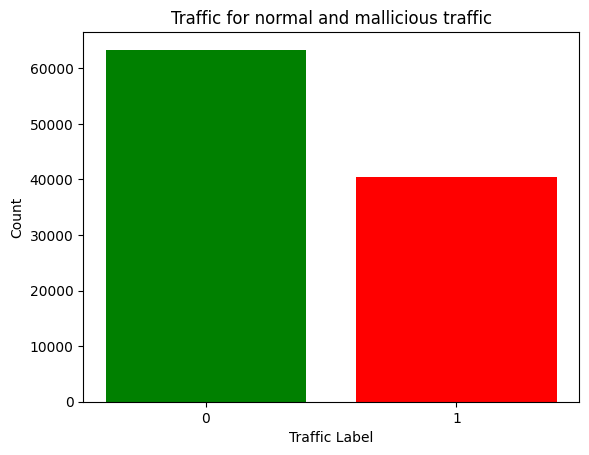

In [156]:
plt.bar(list(gp.index),list(gp.values) ,color = ['g','r'])
plt.xticks(list(gp.index))
plt.xlabel('Traffic Label')
plt.ylabel('Count')
plt.title('Traffic for normal and mallicious traffic')
plt.show()

Final Data

In [157]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [158]:
exit_columns = []

for col in df.columns:
    if df[col].dtypes == 'object':
        exit_columns.append(col)
        
    

In [159]:
exit_columns

['src', 'dst', 'Protocol']

Ignoring Alternate of seperating data on basis of protocols , Encoding protocol Feature instead

In [160]:
# df_udp = df[df['Protocol'] == 'UDP'].drop(exit_columns ,axis=1)
# df_tcp = df[df['Protocol'] == 'TCP'].drop(exit_columns ,axis=1)
# df_icmp = df[df['Protocol'] == 'ICMP'].drop(exit_columns ,axis=1)

In [161]:
exit_columns.append('label')

In [162]:
exit_columns

['src', 'dst', 'Protocol', 'label']

In [163]:
X = df.drop(exit_columns ,axis =1)
Y = df['label']

In [164]:
X

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,212.85,48294064,100,716000000,101000000000.00,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.00,0.00
1,11605,1,355.52,134737070,280,734000000,281000000000.00,2,1943,13531,14424046,451,0,4,3842,3520,0,0.00,0.00
2,11425,1,300.55,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,1,3795,1242,0,0.00,0.00
3,11425,1,300.55,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,2,3688,1492,0,0.00,0.00
4,11425,1,300.55,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,3,3413,3665,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,8.89,7742,81,842000000,81842000000.00,5,10,29,2842,0,0,1,15209,12720,1,1.00,2.00
104341,5262,3,8.89,7742,81,842000000,81842000000.00,5,10,29,2842,0,0,3,15099,14693,1,1.00,2.00
104342,5262,3,5.57,3038,31,805000000,31805000000.00,5,10,30,2940,1,0,2,3409,3731,0,0.00,0.00
104343,5262,3,5.57,3038,31,805000000,31805000000.00,5,10,30,2940,1,0,1,15209,12720,1,1.00,2.00


In [165]:
protocol_encode = pd.get_dummies(df.Protocol ,dtype='int')

In [166]:
protocol_encode

,ICMP,TCP,UDP
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
104340,1,0,0
104341,1,0,0
104342,1,0,0
104343,1,0,0


In [167]:
X = pd.concat([X,protocol_encode],axis=1)

In [168]:
X

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,ICMP,TCP,UDP
0,11425,1,212.85,48294064,100,716000000,101000000000.00,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.00,0.00,0,0,1
1,11605,1,355.52,134737070,280,734000000,281000000000.00,2,1943,13531,14424046,451,0,4,3842,3520,0,0.00,0.00,0,0,1
2,11425,1,300.55,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,1,3795,1242,0,0.00,0.00,0,0,1
3,11425,1,300.55,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,2,3688,1492,0,0.00,0.00,0,0,1
4,11425,1,300.55,96294978,200,744000000,201000000000.00,3,1943,13534,14427244,451,0,3,3413,3665,0,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,8.89,7742,81,842000000,81842000000.00,5,10,29,2842,0,0,1,15209,12720,1,1.00,2.00,1,0,0
104341,5262,3,8.89,7742,81,842000000,81842000000.00,5,10,29,2842,0,0,3,15099,14693,1,1.00,2.00,1,0,0
104342,5262,3,5.57,3038,31,805000000,31805000000.00,5,10,30,2940,1,0,2,3409,3731,0,0.00,0.00,1,0,0
104343,5262,3,5.57,3038,31,805000000,31805000000.00,5,10,30,2940,1,0,1,15209,12720,1,1.00,2.00,1,0,0


In [169]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

#############################################################################################################################################

Feature Scaling 

In [170]:
X_train

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,ICMP,TCP,UDP
11539,9966,4,356.80,135710328,281,874000000,282000000000.00,6,1931,13532,14425112,451,0,2,3343,3539,0,0.00,0.00,0,0,1
78781,14315,3,21.33,562510,1,290000000,1290000000.00,3,22,0,0,0,1,4,677005,29605,179,7.00,186.00,0,1,0
16266,11305,5,322.04,110552728,230,267000000,230000000000.00,3,1306,13536,14429376,451,0,1,3772,110828232,0,3838.00,3838.00,0,0,1
91332,31341,6,21.47,45178,472,826000000,473000000000.00,5,4942,29,2842,0,1,2,135955075,406526991,1,1.00,2.00,1,0,0
57509,33393,1,31.61,97902,1038,533000000,1040000000000.00,7,3024,15,1470,0,1,1,106105,135562112,0,0.00,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48562,27377,7,26.89,70854,741,239000000,741000000000.00,5,956,29,2842,0,1,4,77308,135537140,0,0.00,0.00,1,0,0
59517,33903,1,26.65,69580,728,351000000,728000000000.00,3,3034,29,2842,0,1,3,135737823,278285,0,0.00,0.00,1,0,0
77555,42155,4,276.22,4120200,141,30000000,141000000000.00,7,13231,16162,872748,538,1,2,6004,1312,0,0.00,0.00,0,1,0
67730,30612,2,29.29,84084,879,947000000,880000000000.00,7,2063,29,2842,0,1,2,21046,17188,0,0.00,0.00,1,0,0


In [171]:
X_test

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,ICMP,TCP,UDP
20723,2799,2,272.77,77527926,267,463000000,267000000000.00,5,4440,9357,9749994,311,0,1,4447,235773168,0,5379.00,5379.00,0,0,1
91482,30771,6,360.48,135401648,472,744000000,473000000000.00,7,4920,8341,8691322,278,1,1,105752,101398,0,0.00,0.00,1,0,0
6696,11365,3,169.00,29761604,90,867000000,90867000000.00,5,1790,9446,9842732,314,0,2,3646,1492,0,0.00,0.00,0,0,1
51047,27948,3,22.76,50764,531,186000000,531000000000.00,8,2790,29,2842,0,1,2,57657,114984034,0,2437.00,2437.00,1,0,0
16181,11305,5,203.46,43132548,130,787000000,131000000000.00,3,1306,9432,9828144,314,0,2,3668,38836744,0,3838.00,3838.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79264,14465,6,15.43,12852,0,348000000,348000000.00,9,835,0,0,0,1,3,223555758,9192821,11929,514.00,12443.00,0,1,0
56864,33273,2,29.93,87808,918,530000000,919000000000.00,10,2936,29,2842,0,1,1,286768770,270364306,2572,2.00,2574.00,1,0,0
35241,11019,3,330.91,6351232,360,744000000,361000000000.00,5,4357,8896,515968,296,1,3,172368465,20034100,505,271.00,776.00,0,1,0
27822,2949,5,359.10,134366942,467,348000000,467000000000.00,2,4440,6027,6280134,200,0,1,4033,1312,0,0.00,0.00,0,0,1


In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [173]:
X_test

array([[-1.2710973 , -1.13603364,  0.64365097, ..., -0.81399251,
        -0.62905133,  1.46460919],
       [ 1.06525735,  0.91248026,  1.29590899, ...,  1.22851253,
        -0.62905133, -0.682776  ],
       [-0.55562418, -0.62390516, -0.12802397, ..., -0.81399251,
        -0.62905133,  1.46460919],
       ...,
       [-0.58452375, -0.62390516,  1.07605439, ..., -0.81399251,
         1.5896954 , -0.682776  ],
       [-1.25856858,  0.40035178,  1.28564652, ..., -0.81399251,
        -0.62905133,  1.46460919],
       [ 1.29177651, -1.64816211, -1.25603651, ...,  1.22851253,
        -0.62905133, -0.682776  ]])

##################################################################################################################################################################################################

## Data Model building

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [175]:
X_train.shape

(83071, 22)

In [176]:
classifier = Sequential()

In [177]:
#Input Layer
classifier.add(Dense(units=22,activation ='relu'))

In [178]:
classifier.add(Dense(units=10,activation = 'relu'))

In [179]:
classifier.add(Dense(units=10,activation = 'relu'))

In [180]:
classifier.add(Dense(units=7,activation = 'relu'))

In [181]:
classifier.add(Dense(1,activation = 'sigmoid'))

In [183]:
import tensorflow
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [184]:
#Alternate method directly declaring optimizwaer-- classifier.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.compile(optimizer = opt,loss='binary_crossentropy',metrics=['accuracy'])


In [185]:
#Early Stopping
import tensorflow as tf 

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [186]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
5566/5566 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9136 - loss: 0.1816 - val_accuracy: 0.9521 - val_loss: 0.1094
Epoch 2/1000
5566/5566 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9689 - loss: 0.0809 - val_accuracy: 0.9579 - val_loss: 0.0923
Epoch 3/1000
5566/5566 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9737 - loss: 0.0690 - val_accuracy: 0.9613 - val_loss: 0.0906
Epoch 4/1000
5566/5566 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9766 - loss: 0.0652 - val_accuracy: 0.9783 - val_loss: 0.0543
Epoch 5/1000
5566/5566 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9795 - loss: 0.0600 - val_accuracy: 0.9842 - val_loss: 0.0483
Epoch 6/1000
5566/5566 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9801 - loss: 0.0553 - val_accuracy: 0.9843 - val_loss: 0.0395
Epoch 7/1000
5566/5566 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9824 - loss: 0.0453 - val_accuracy: 0.9810 - val_loss: 0.0533
Epoch 8/1000
5566/5566 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9830 -

In [187]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

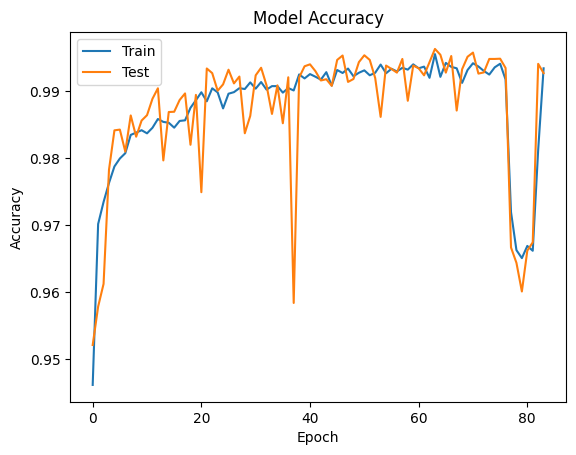

In [188]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

Inference : By using Early Stoppping , we reduce the delta present btw testing and training accuracy in the most efficient way possible .

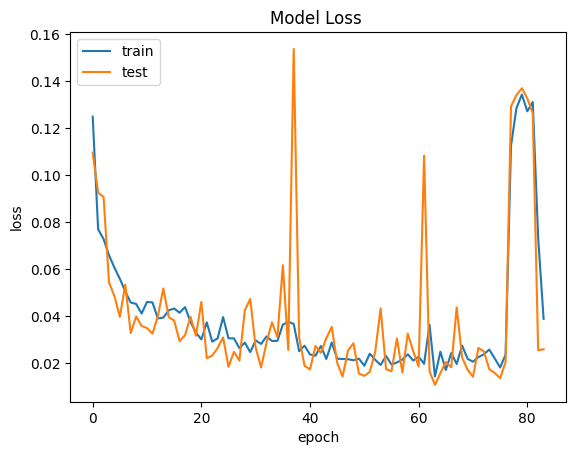

In [193]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

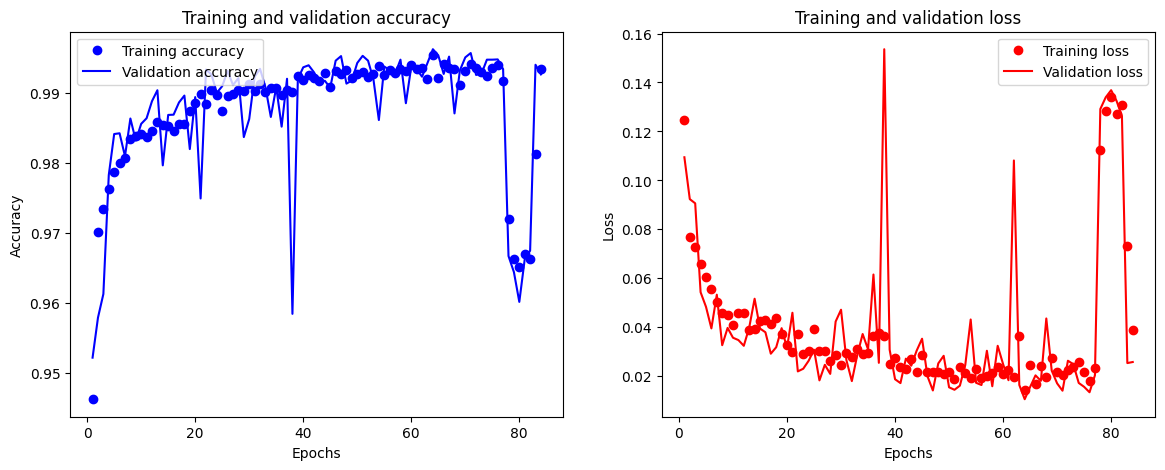

In [192]:
import matplotlib.pyplot as plt

epochs = range(1, len(model_history.history['accuracy']) + 1)
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

#  loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [196]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step


In [198]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,y_pred)
cm

array([[12629,    20],
       [  130,  7989]], dtype=int64)

In [199]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,Y_test)

In [200]:
score

0.9927773497688752

In [201]:
classifier.get_weights

<bound method Layer.get_weights of <Sequential name=sequential_2, built=True>>

In [202]:
classifier.get_weights()

[array([[ 2.99226308e+00, -5.16612005e+00,  5.95401430e+00,
          6.98244154e-01, -3.55732393e+00,  6.90132713e+00,
          1.66729653e+00, -7.54710913e-01,  1.75095260e+00,
          5.23493862e+00,  4.78969479e+00,  2.77851844e+00,
         -1.78893745e+00, -2.03089237e+01,  9.97987461e+00,
          6.44463921e+00, -9.95877457e+00,  8.61352921e-01,
         -1.53463423e+00,  6.21176697e-03, -2.45650816e+00,
         -4.35189533e+00],
        [ 7.96083498e+00, -3.84708881e+00,  2.57220030e+00,
         -1.17490139e+01, -2.36431289e+00, -1.10479224e+00,
         -3.37690830e+00,  5.90222180e-01,  2.18777776e+00,
         -2.73361415e-01, -2.59496689e-01,  1.46159679e-01,
          9.46142387e+00,  1.23591936e+00,  4.65819836e-01,
          5.91632605e-01,  4.05313969e+00,  2.21645068e-02,
          1.01992154e+00,  9.03687030e-02,  6.96016133e-01,
          2.76588464e+00],
        [-3.64034700e+00,  2.27155399e+00, -5.77687979e+00,
         -1.04532471e+01,  2.45744014e+00,  1.

In [205]:
X_train[1]

array([-0.30922614, -0.62390516, -1.22621382, -0.76890947, -1.13373678,
       -0.61739306, -1.13454618, -0.90317102, -0.9835565 , -0.86615382,
       -0.62554994, -0.86394849,  0.80956431,  1.5378866 , -0.61180674,
       -0.70408636, -0.33998686, -0.48451867, -0.57939521, -0.81399251,
        1.5896954 , -0.682776  ])

In [206]:
input_data = np.array([[-0.30922614, -0.62390516, -1.22621382, -0.76890947, -1.13373678,
                        -0.61739306, -1.13454618, -0.90317102, -0.9835565 , -0.86615382,
                        -0.62554994, -0.86394849,  0.80956431,  1.5378866 , -0.61180674,
                        -0.70408636, -0.33998686, -0.48451867, -0.57939521, -0.81399251,
                         1.5896954 , -0.682776]])

In [212]:

y_pred = classifier.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [208]:
y_pred_binary = (y_pred >= 0.5)

In [211]:
print("Predicted probability:", y_pred)
print("Predicted classes (binary):", y_pred_binary)

Predicted probability: [[0.00577813]]
Predicted classes (binary): [[False]]
